In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

# 读取数据集


## 去除重复值&字段重命名

In [2]:
test_data = pd.read_csv('data_format1/test_format1.csv')
train_data = pd.read_csv('data_format1/train_format1.csv')

user_info = pd.read_csv('data_format1/user_info_format1.csv')
user_log = pd.read_csv('data_format1/user_log_format1.csv')

In [3]:
user_info = user_info.drop_duplicates()
user_log = user_log.rename({'seller_id':'merchant_id'})

## 显示数据前几行


In [4]:
test_data.head()

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


In [5]:
train_data.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [6]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [7]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829.0,0.0
1,328862,844400,1271,2882,2661.0,829.0,0.0
2,328862,575153,1271,2882,2661.0,829.0,0.0
3,328862,996875,1271,2882,2661.0,829.0,0.0
4,328862,1086186,1271,1253,1049.0,829.0,0.0


## 查看数据类型和数据大小

In [8]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.9 MB


In [9]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331619 entries, 0 to 331618
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      331619 non-null  int64  
 1   item_id      331619 non-null  int64  
 2   cat_id       331619 non-null  int64  
 3   seller_id    331619 non-null  int64  
 4   brand_id     331206 non-null  float64
 5   time_stamp   331618 non-null  float64
 6   action_type  331618 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 20.2 MB


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


# 查看缺失值

根据赛题描述：用户年龄范围。<18岁为1；[18,24]为2； [25,29]为3； [30,34]为4；[35,39]为5；[40,49]为6； > = 50时为7和8; 0和NULL表示未知

In [11]:
# 先查看年龄缺失值的情况
# 从下面的运行结果来看：年龄缺失值率是0.5%，当年龄确实或者年龄默认为0是，可以认为该数据缺失，缺失的数据共有95131条

In [12]:
(user_info.shape[0] - user_info['age_range'].count()) / user_info.shape[0]

0.005226677982884221

In [13]:
user_info[(user_info['age_range'].isna() | user_info['age_range']==0)].count()

user_id      92914
age_range    92914
gender       90638
dtype: int64

In [14]:
user_info.groupby(['age_range']).agg({'user_id':'count'}).reset_index()

,age_range,user_id
0,0.0,92914
1,1.0,24
2,2.0,52871
3,3.0,111654
4,4.0,79991
5,5.0,40777
6,6.0,35464
7,7.0,6992
8,8.0,1266


In [15]:
#查看性别缺失
# 性别缺失率为1.5%,当性别缺失或者性别值默认为2是，可认为该数据缺失，有缺失值的数据共有16862条

In [16]:
(user_info.shape[0] - user_info['gender'].count()) / user_info.shape[0]

0.01517316170403376

In [17]:
user_info[(user_info['gender'].isna()) | (user_info['gender']==2)].count()

user_id      16862
age_range    14664
gender       10426
dtype: int64

In [18]:
user_info.groupby(['gender']).agg({'user_id':'count'}).reset_index()

,gender,user_id
0,0.0,285638
1,1.0,121670
2,2.0,10426


In [19]:
# 查看年龄或者性别有一个缺失的情况
# 可以看到有缺失值的数据共有106330条

In [20]:
user_info[(user_info['age_range'].isna()) | (user_info['age_range']==0)|(user_info['gender'].isna()) | (user_info['gender']==2)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

In [21]:
# 查看用户行为日志数据缺失的情况
# brand_id 字段共有91015条缺失数据

In [22]:
user_log.isna().sum()

user_id          0
item_id          0
cat_id           0
seller_id        0
brand_id       413
time_stamp       1
action_type      1
dtype: int64

# 查看数据分布

可视化查看正负样本情况

In [23]:
# 可以看到样本分布不均衡，粗腰采取一定的措施处理样本
# 1：负样本过采样
# 2：训练多个模型后求平均或者调整模型的损失函数样本比例权重等

0    244912
1     15952
Name: label, dtype: int64

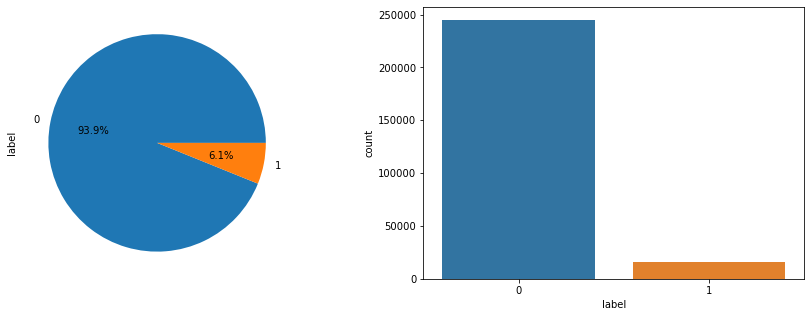

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
train_data['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train_data['label'])
train_data['label'].value_counts()

# 探索影响复购的各种因素

## 对店铺的分析

### 用户复购可能受到店铺、用户、用户性别、用户年龄等因素的影响，下面逐一分析

In [25]:
print('选取top5店铺\n 店铺\t 购买次数')
print(train_data.merchant_id.value_counts().head(5))

选取top5店铺
 店铺	 购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


<AxesSubplot:title={'center':'Meachant VS Label'}, xlabel='merchant_id', ylabel='count'>

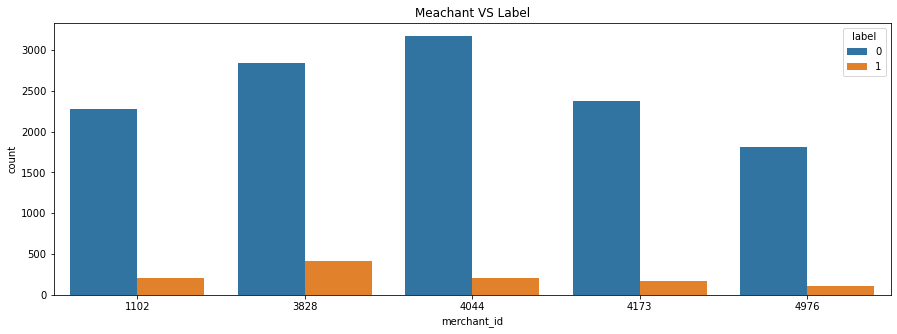

In [26]:
train_data_merchant = train_data.copy()

# 选取Top5的店铺进行比较
train_data_merchant = train_data_merchant[train_data_merchant['merchant_id'].isin([4044,3828,4173,1102,4976])]
plt.figure(figsize=(15,5))
plt.title('Meachant VS Label')
sns.countplot('merchant_id',hue='label',data=train_data_merchant)

In [27]:
# 由上面可以看到：不同店铺有不同的复购比例，可能与店铺售卖的商品及运营有关

### 查看店铺的复购分布

((array([-3.33808479, -3.08323587, -2.94165416, ...,  2.94165416,
          3.08323587,  3.33808479]),
  array([0.00483092, 0.0049505 , 0.005     , ..., 0.35      , 0.43243243,
         0.52941176])),
 (0.04432673682235347, 0.0662134249238816, 0.9093465643346749))

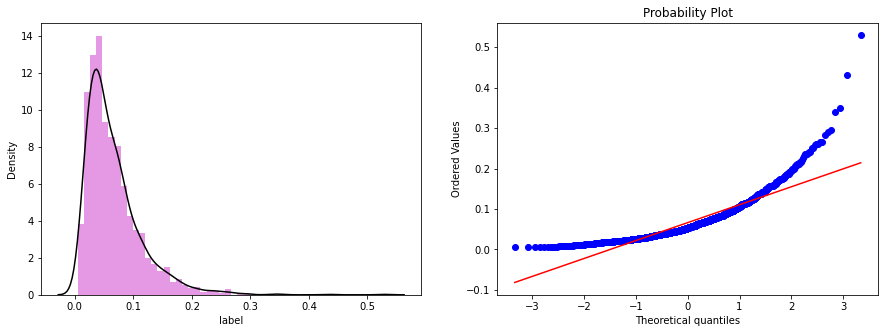

In [28]:
merchant_repeat_buy  = train_data.groupby('merchant_id').agg({'label':'mean'}).reset_index()

# 筛选复购率大于0的
merchant_repeat_buy = merchant_repeat_buy[merchant_repeat_buy['label'] >0]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy['label'],color='m', kde_kws={"color": "k"})
plt.subplot(1,2,2)
stats.probplot(merchant_repeat_buy['label'],plot=plt)

In [29]:
#由上面可以看出：不同店铺有不同的复购概率，为0~0.3

## 对用户的分析

### 查看用户的复购分布 

((array([-3.91957884, -3.70033666, -3.58023444, ...,  3.58023444,
          3.70033666,  3.91957884]),
  array([0.05882353, 0.07142857, 0.08333333, ..., 1.        , 1.        ,
         1.        ])),
 (0.20565911292515038, 0.8336019676735434, 0.7952290281948186))

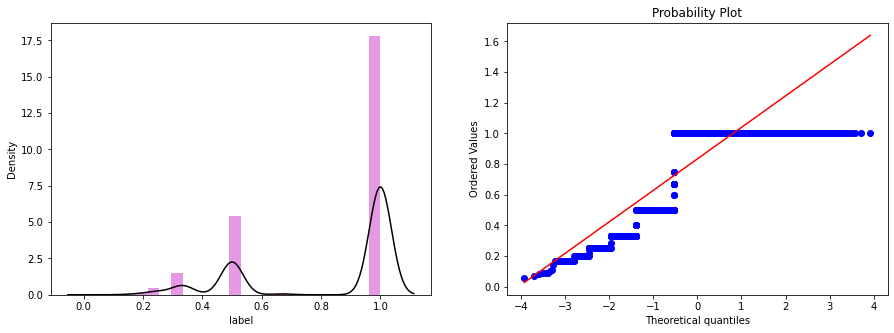

In [30]:
user_repeat_buy  = train_data.groupby('user_id').agg({'label':'mean'}).reset_index()

# 筛选复购率大于0的
user_repeat_buy = user_repeat_buy[user_repeat_buy['label'] >0]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(user_repeat_buy['label'],color='m', kde_kws={"color": "k"})
plt.subplot(1,2,2)
stats.probplot(user_repeat_buy['label'],plot=plt)

In [31]:
# 由上面可以看出，近6个月的复购概率很小，基本以买一次为主

## 对用户性别进行分析

<AxesSubplot:title={'center':'Gender VS Label'}, xlabel='gender', ylabel='count'>

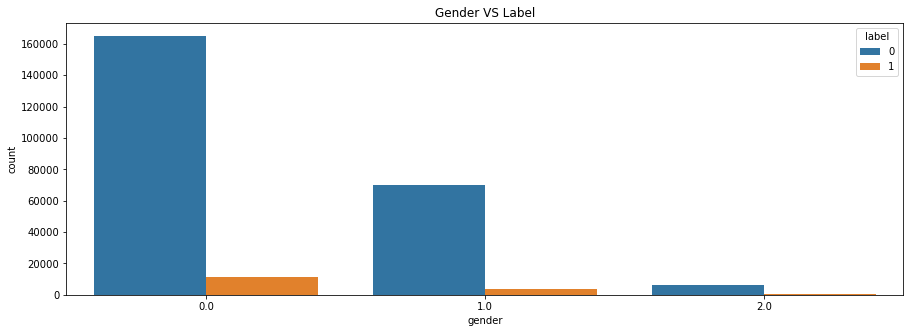

In [32]:
# 分析用户性别与复购的关系，并且可视化

train_data_uer_info = train_data.merge(user_info,on=['user_id'],how='left')
plt.figure(figsize=(15,5))
plt.title('Gender VS Label')
sns.countplot(train_data_uer_info['gender'],hue='label',data=train_data_uer_info)

((array([-0.81932862,  0.        ,  0.81932862]),
  array([0.05381257, 0.06454703, 0.06902477])),
 (0.009283334490793665, 0.06246145901587707, 0.9729449031244433))

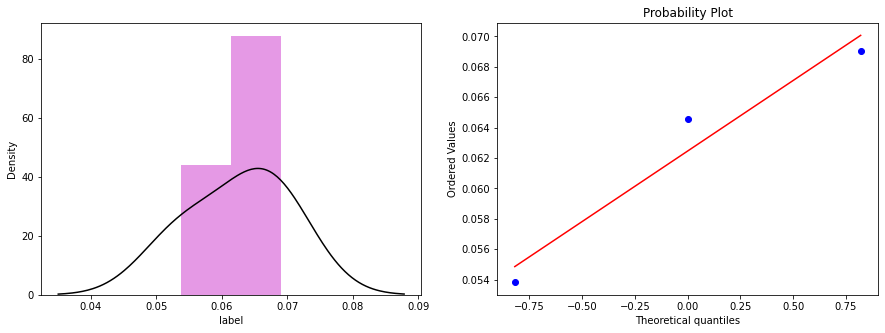

In [33]:
# 查看用户性别与复购的分布
repeat_buy  = train_data_uer_info.groupby('gender').agg({'label':'mean'}).reset_index()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(repeat_buy['label'],color='m', kde_kws={"color": "k"})
plt.subplot(1,2,2)
stats.probplot(repeat_buy['label'],plot=plt)


## 用户年龄的分布

<AxesSubplot:title={'center':'Age VS Label'}, xlabel='age_range', ylabel='count'>

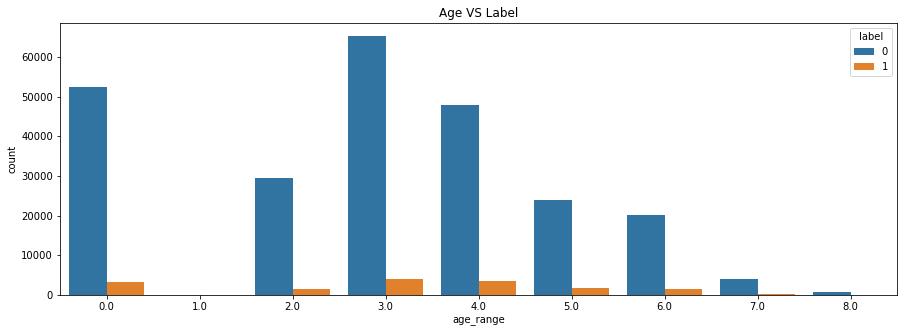

In [34]:
# 分析用户性别与复购的关系，并且可视化

plt.figure(figsize=(15,5))
plt.title('Age VS Label')
sns.countplot(train_data_uer_info['age_range'],hue='label',data=train_data_uer_info)

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([0.        , 0.04934571, 0.0588159 , 0.05895107, 0.06043689,
         0.06721967, 0.06833786, 0.06944444, 0.06998985])),
 (0.019149584793711535, 0.05583793334233906, 0.7933208038285727))

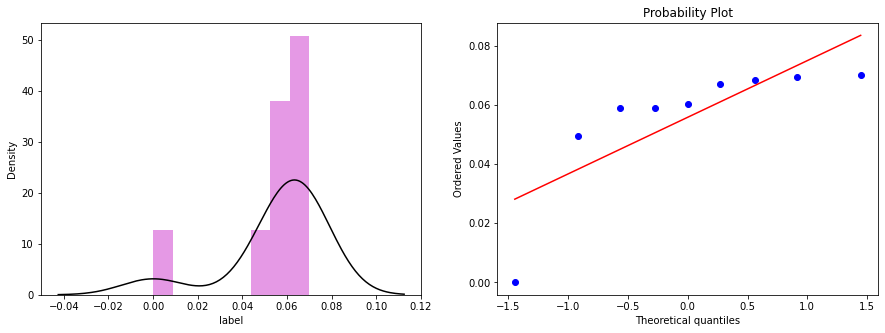

In [35]:
repeat_buy  = train_data_uer_info.groupby('age_range').agg({'label':'mean'}).reset_index()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(repeat_buy['label'],color='m', kde_kws={"color": "k"})
plt.subplot(1,2,2)
stats.probplot(repeat_buy['label'],plot=plt)


In [36]:
# 由上面可以看到不同年龄段用户的复购率也不同

# 特征工程 

In [37]:
import gc
from collections import Counter
import copy

## 数据处理

### 合并用户信息

In [38]:
all_data = train_data.append(test_data)
all_data = all_data.merge(user_info,on=['user_id'],how='left')

del train_data,test_data,user_info
gc.collect()


5984

In [39]:
all_data.head()

,user_id,merchant_id,label,prob,age_range,gender
0,34176,3906,0.0,NaN,6.0,0.0
1,34176,121,0.0,NaN,6.0,0.0
2,34176,4356,1.0,NaN,6.0,0.0
3,34176,2217,0.0,NaN,6.0,0.0
4,230784,4818,0.0,NaN,0.0,0.0


In [40]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829.0,0.0
1,328862,844400,1271,2882,2661.0,829.0,0.0
2,328862,575153,1271,2882,2661.0,829.0,0.0
3,328862,996875,1271,2882,2661.0,829.0,0.0
4,328862,1086186,1271,1253,1049.0,829.0,0.0


### 将用户行为日志信息按时间进行排序

In [41]:
user_log = user_log.sort_values(['user_id','time_stamp'])

In [42]:
'''
合并数据
'''

list_join_func = lambda x: " ".join([str(i) for i in x])


agg_dict = {
    'item_id':list_join_func,
    'cat_id':list_join_func,
    'seller_id':list_join_func,
    'brand_id':list_join_func,
    'time_stamp':list_join_func,
    'action_type':list_join_func
}

rename_dict = {
    'item_id':'item_path',
    'cat_id':'cat_path',
    'seller_id':'seller_path',
    'brand_id':'brand_path',
    'time_stamp':'time_stamp_path',
    'action_type':'action_type_path'
}

def merge_list(df_ID,join_columns,df_data,agg_dict,rename_dict):
    df_data = df_data.groupby(join_columns).agg(agg_dict).reset_index().rename(columns=rename_dict)
    df_ID = df_ID.merge(df_data,on=join_columns,how='left')
    return df_ID


In [43]:
all_data = merge_list(all_data,'user_id',user_log,agg_dict,rename_dict)

In [44]:
del user_log
gc.collect()

30

## 定义特征统计函数

In [45]:
# 定义统计数据总数的函数
def cnt_(x):
    try:
        return len(x.split(' '))
    except:
        return -1


# 定义统计数据唯一值的函数
def nunique_(x):
    try:
        return len(set(x.split(' ')))
    except:
        return -1


# 定义统计数据最大值的函数
def max_(x):
    try:
        return np.max([float(i) for i in x.split(' ')])
    except:
        return -1

    
# 定义统计数据最小值的函数
def min_(x):
    try:
        return np.min([float(i) for i in x.split(' ')])
    except:
        return -1


# 定义统计数据标准差的函数
def std_(x):
    try:
        return np.std([float(i) for i in x.split(' ')])
    except:
        return -1  


# 定义统计数据标Top N 的函数
def most_n(x,n):
    try:
        return Counter(x.split(' ')).most_common(n)[n-1][0]
    except:
        return -1  
    
    
# 定义统计数据标Top N数据总数的函数
def most_n_cnt(x,n):
    try:
        return Counter(x.split(' ')).most_common(n)[n-1][1]
    except:
        return -1  

### 调用定义的统计函数

In [46]:
def user_cnt(df_data,single_col,name):
    df_data[name] = df_data[single_col].apply(cnt_)
    return df_data

def user_nunique(df_data,single_col,name):
    df_data[name] = df_data[single_col].apply(nunique_)
    return df_data

def user_max(df_data,single_col,name):
    df_data[name] = df_data[single_col].apply(max_)
    return df_data

def user_min(df_data,single_col,name):
    df_data[name] = df_data[single_col].apply(min_)
    return df_data

def user_std(df_data,single_col,name):
    df_data[name] = df_data[single_col].apply(std_)
    return df_data

def user_most_n(df_data,single_col,name,n=1):
    func = lambda x:most_n(x,n)
    df_data[name] = df_data[single_col].apply(func)
    return df_data

def user_most_n_cnt(df_data,single_col,name,n=1):
                    func = lambda x:most_n_cnt(x,n)
                    df_data[name]  = df_data[single_col].apply(func)
                    return df_data

### 提取统计特征

#### 店铺特征统计：统计与店铺特点相关的特征，如店铺、商品、品牌等

In [47]:
'''
提取基本统计特征
'''

all_data_test = all_data

#统计用户点击、浏览、加购、购买行为

# 总次数
all_data_test = user_cnt(all_data_test,'seller_path','user_cnt')

# 统计不同店铺的个数
all_data_test = user_nunique(all_data_test,'seller_path','seller_nunique')

# 统计不同品类个数
all_data_test = user_nunique(all_data_test,'cat_path','cat_nunique')

# 统计不同品牌个数
all_data_test = user_nunique(all_data_test,'brand_path','brand_nunique')

# 统计不同商品个数
all_data_test = user_nunique(all_data_test,'item_path','item_nunique')

# 活跃天数
all_data_test = user_nunique(all_data_test,'time_stamp_path','time_stamp_nunique')

# 不同用户行为种数
all_data_test = user_nunique(all_data_test,'action_type_path','action_type_nunique')

# 最晚时间
all_data_test = user_max(all_data_test,'time_stamp_path','time_stamp_max')

# 最早时间
all_data_test = user_min(all_data_test,'time_stamp_path','time_stamp_min')

# 活跃天数方差
all_data_test = user_std(all_data_test,'time_stamp_path','time_stamp_std')

# 最早最晚相差天数
all_data_test['time_stamp_range'] = all_data_test['time_stamp_max'] - all_data_test['time_stamp_min']

In [48]:
# 用户最喜欢额店铺：行为次数
all_data_test = user_most_n_cnt(all_data_test,'seller_path','seller_most_1_cnt',n=1)

# 用户最喜欢的类别：行为次数
all_data_test = user_most_n_cnt(all_data_test,'cat_path','cat_most_1_cnt',n=1)

# 用户最喜欢的品牌：行为次数
all_data_test = user_most_n_cnt(all_data_test,'brand_path','brand_most_1_cnt',n=1)

# 用户最喜欢的行为动作：行为次数
all_data_test = user_most_n_cnt(all_data_test,'action_type_path','action_type_most_1_cnt',n=1)

#### 用户特征统计：对用户将的点击、加购、购买、搜藏等特征进行统计

In [49]:
def col_cnt_(df_data,columns_list,action_type):
    try:
        data_dict = {}
        col_list = copy.deepcopy(columns_list)
        if action_type != None:
            col_list += ['action_type_path']
        
        for col in col_list:
            data_dict[col] = df_data[col].split(' ')
        
        path_len = len(data_dict[col])
        
        data_out = []
        for i_ in range(path_len):
            data_txt = ''
            for col_ in columns_list:
                if data_dict['action_type_path'][i_] == action_type:
                    data_txt += '_' + data_dict[col_][i_]
            data_out.append(data_txt)
        return len(data_out)
    except:
        return -1
    
def col_nuique_(df_data,columns_list,action_type):
    try:
        data_dict = {}
        col_list = copy.deepcopy(columns_list)
        if action_type != None:
            col_list += ['action_type_path']
        
        for col in col_list:
            data_dict[col] = df_data[col].split(' ')
            
        path_len = len(data_dict[col])
        
        data_out = []
        for i_ in range(path_len):
            data_txt = ''
            for col_ in columns_list:
                if data_dict['action_type_path'][i_] == action_type:
                    data_txt += '_' + data_dict[col_][i_]
            data_out.append(data_txt)
        return len(set(data_out))
    except:
        return -1
        
        
def user_col_cnt(df_data,columns_list,action_type,name):
    df_data[name] = df_data.apply(lambda x: col_cnt_(x,columns_list,action_type),axis=1)
    
    return df_data

def user_col_nunique(df_data,columns_list,action_type,name):
    df_data[name] = df_data.apply(lambda x: col_nuique_(x,columns_list,action_type),axis=1)
    
    return df_data


            

#### 统计用户和店铺的关系：对店铺的用户点击次数、加购次数、购买次数、收藏次数等进行统计

In [50]:
# 点击次数
all_data_test = user_col_cnt(all_data_test,['seller_path'],'0','user_cnt_0')

# 加购次数
all_data_test = user_col_cnt(all_data_test,['seller_path'],'1','user_cnt_1')

# 购买次数
all_data_test = user_col_cnt(all_data_test,['seller_path'],'2','user_cnt_2')

# 收藏次数
all_data_test = user_col_cnt(all_data_test,['seller_path'],'3','user_cnt_3')

In [51]:
all_data_test.head()

,user_id,merchant_id,label,prob,age_range,gender,item_path,cat_path,seller_path,brand_path,...,time_stamp_std,time_stamp_range,seller_most_1_cnt,cat_most_1_cnt,brand_most_1_cnt,action_type_most_1_cnt,user_cnt_0,user_cnt_1,user_cnt_2,user_cnt_3
0,34176,3906,0.0,NaN,6.0,0.0,NaN,NaN,NaN,NaN,...,-1.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1
1,34176,121,0.0,NaN,6.0,0.0,NaN,NaN,NaN,NaN,...,-1.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1
2,34176,4356,1.0,NaN,6.0,0.0,NaN,NaN,NaN,NaN,...,-1.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1
3,34176,2217,0.0,NaN,6.0,0.0,NaN,NaN,NaN,NaN,...,-1.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1
4,230784,4818,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,-1.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1


### 特征组合

#### 特征组合进行业务特征提取

In [52]:
all_data_test = user_col_nunique(all_data_test,['seller_path','item_path'],'0','seller_nunique_0')

In [54]:
all_data_test.to_csv('all_data_test.csv',index=False)

## 利用Countvector和TF-IDF提取特征 

### 利用Countvector和TF-IDF提取特征

In [53]:
'''
利用Countvector和TF-IDF提取特征
'''

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from scipy import sparse

tfidVec = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,1),max_features=100)

columns_list = ['seller_path']
for i,col in enumerate(columns_list):
    tfidVec.fit(all_data_test[col])
    data_ = tfidVec.transform(all_data_test[col])
    if i == 0:
        data_cat = data_
    else:
        data_cat = sparse.hstack((data_cat,data_))
        

ValueError: np.nan is an invalid document, expected byte or unicode string.

### 特征重命名和特征合并

In [ ]:
df_tfidf = pd.DataFrame(data_cat.toarray())

df_tfidf.columns = ['tfidf_' + str(i) for i in df_tfidf.columns]

In [ ]:
all_data_test = pd.concat([all_data_test,df_tfidf],axis=1)

In [ ]:
all_data_test.head()

In [ ]:
all_data_test.to_csv('all_data_test.csv',index=False)

## 嵌入特征

In [ ]:
import gensim